In [59]:
import os
import sys
import struct
import subprocess
import urllib


In [71]:
import numpy, scipy, matplotlib.pyplot as plt, sklearn, IPython.display, librosa, urllib
%matplotlib inline
plt.rcParams['figure.figsize'] = (14,5)

In [72]:
filename = 'conga_groove.wav'
#urllib.urlretrieve('http://audio.musicinformationretrieval.com/' + filename,
#                 filename=filename)

In [73]:
x, fs = librosa.load(filename)
print fs

22050


In [74]:
x[0] = 1 # hack to prevent automatic gain scaling
IPython.display.Audio(x, rate=fs)

In [75]:
S = librosa.stft(x)
print S.shape

(1025, 188)


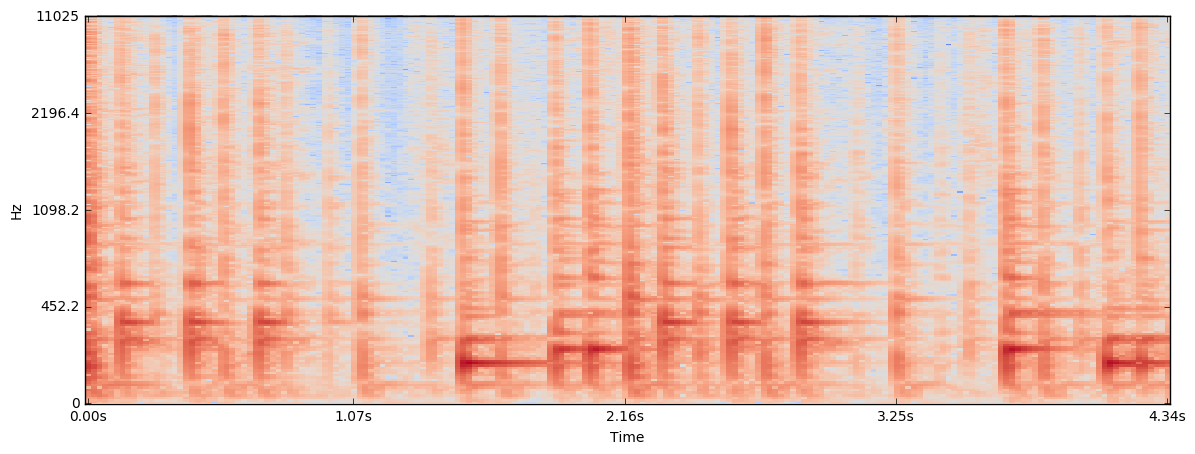

In [76]:
logX = librosa.logamplitude(S)
librosa.display.specshow(logX, sr=fs, x_axis='time', y_axis='log')

In [66]:
X = numpy.absolute(S)
n_components = 6
W, H = librosa.decompose.decompose(X, n_components=n_components, sort=True)
print W.shape
print H.shape

(1025, 6)
(6, 188)


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


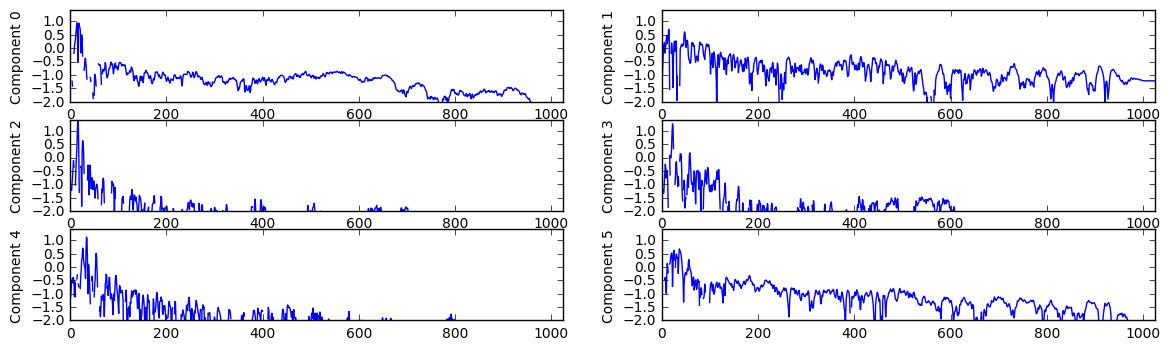

In [67]:
logW = numpy.log10(W)
for n in range(n_components):
    plt.subplot(numpy.ceil(n_components/2.0), 2, n+1)
    plt.plot(logW[:,n])
    plt.ylim(-2, logW.max())
    plt.xlim(0, W.shape[0])
    plt.ylabel('Component %d' % n)

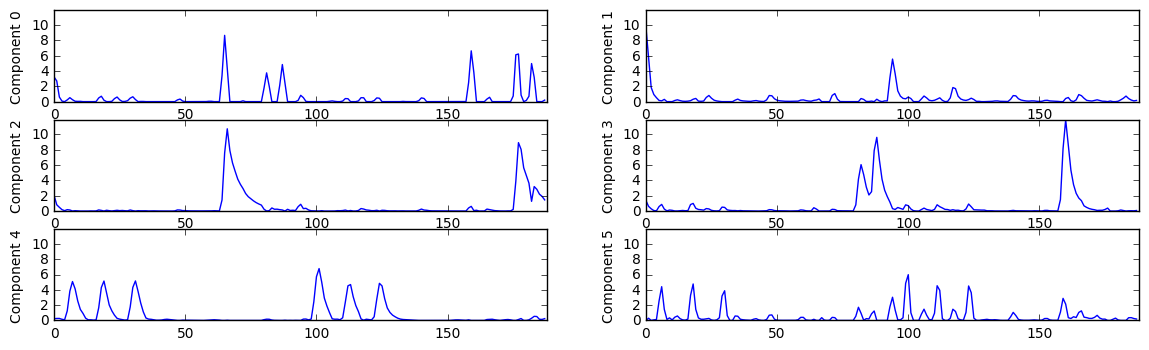

In [68]:
for n in range(n_components):
    plt.subplot(numpy.ceil(n_components/2.0), 2, n+1)
    plt.plot(H[n])
    plt.ylim(0, H.max())
    plt.xlim(0, H.shape[1])
    plt.ylabel('Component %d' % n)

In [69]:
reconstructed_signal = scipy.zeros(len(x))
for n in range(n_components):
    Y = scipy.outer(W[:,n], H[n])*numpy.exp(1j*numpy.angle(S))
    y = librosa.istft(Y)
    reconstructed_signal[:len(y)] += y
    IPython.display.display( IPython.display.Audio(y, rate=fs) )

In [70]:
IPython.display.Audio(reconstructed_signal, rate=fs)
